In [ ]:
pip install pyspellchecker 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.7 MB 4.8 MB/s 


In [ ]:
pip install language-tool-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install transformers -q

     |████████████████████████████████| 4.4 MB 3.2 MB/s 
     |████████████████████████████████| 6.6 MB 38.9 MB/s 
     |████████████████████████████████| 596 kB 46.5 MB/s 
     |████████████████████████████████| 101 kB 7.0 MB/s 


In [ ]:
pip install happytransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 1.9 MB/s 
     |████████████████████████████████| 362 kB 8.6 MB/s 
     |████████████████████████████████| 1.2 MB 49.9 MB/s 
     |████████████████████████████████| 140 kB 52.8 MB/s 
     |████████████████████████████████| 212 kB 48.5 MB/s 
     |████████████████████████████████| 1.1 MB 44.4 MB/s 
     |████████████████████████████████| 127 kB 12.1 MB/s 
     |████████████████████████████████| 144 kB 44.2 MB/s 
     |████████████████████████████████| 271 kB 48.4 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk

In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

accepted = pd.read_csv("/content/drive/MyDrive/LC/Lending_Club_Accepted_2014_2018.csv")
rejected = pd.read_csv("/content/drive/MyDrive/LC/Lending_Club_Rejected_2014_2018.csv")
accepted_all = pd.read_csv("/content/drive/MyDrive/LC/accepted_2007_to_2018Q4.csv")

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# create column: if the loan is paid
accepted_all['paid'] = False
accepted_all.loc[accepted_all['loan_status'] == 'Fully Paid', 'paid'] = True

In [ ]:
# create column: if description exists
accepted_all['has_desc'] = False
accepted_all.loc[~accepted_all['desc'].isnull(), 'has_desc'] = True

In [ ]:
# Q1: does having description influence chance of loan getting paid?
# 1(a) overview
s = accepted_all.groupby('paid').agg({'has_desc': ['sum', 'count']}).reset_index(level=0)
s = s.rename(columns={'sum': '#desc'})
s.columns = [col[1] if col[1] else col[0] for col in s.columns.tolist()]
s['%desc'] = s['#desc']/s['count']
s

,paid,#desc,count,%desc
0,False,2517,713493,0.003528
1,True,12823,715126,0.017931


In [ ]:
from scipy.stats import chi2_contingency
contigency = pd.crosstab(accepted_all['has_desc'], accepted_all['paid']) 
c, p, dof, expected = chi2_contingency(contigency)
p 

0.0

In [ ]:
# 1(b) by grade group
s = accepted_all.groupby(['grade', 'paid']).agg({'has_desc': ['sum', 'count']}).reset_index()
s = s.rename(columns={'sum': '#desc'})
s.columns = [col[1] if col[1] else col[0] for col in s.columns.tolist()]
s['%desc'] = s['#desc']/s['count']
s

,grade,paid,#desc,count,%desc
0,A,False,136,125318,0.001085
1,A,True,2449,155694,0.015730
2,B,False,538,186225,0.002889
3,B,True,4541,219362,0.020701
4,C,False,817,213001,0.003836
5,C,True,3386,196322,0.017247
6,D,False,628,113727,0.005522
7,D,True,1649,90893,0.018142
8,E,False,272,53898,0.005047
9,E,True,587,39068,0.015025


In [ ]:
pvalues = []
for g in accepted_all[~accepted_all['grade'].isnull()]['grade'].unique():
  df = accepted_all[accepted_all['grade'] == g]
  contigency = pd.crosstab(df['has_desc'], df['paid']) 
  c, p, dof, expected = chi2_contingency(contigency)
  pvalues.append([g, p])
results = pd.DataFrame(pvalues, columns=['grade', 'p'])
results.sort_values(by=['grade'], inplace = True)
results.reset_index(drop=True)

,grade,p
0,A,0.000000e+00
1,B,0.000000e+00
2,C,0.000000e+00
3,D,8.807464e-161
4,E,2.793605e-55
5,F,1.102595e-15
6,G,7.885460e-04


In [ ]:
# Q2: does having description influence interest rate?
# 2(a) overview
s = accepted_all.groupby('has_desc').agg({'int_rate': ['mean', 'median', 'std']}).reset_index(level=0)
s.columns = [col[1] if col[1] else col[0] for col in s.columns.tolist()]
s

,has_desc,mean,median,std
0,False,12.931666,12.49,4.788618
1,True,13.721537,13.65,4.129342


KeyboardInterrupt: ignored

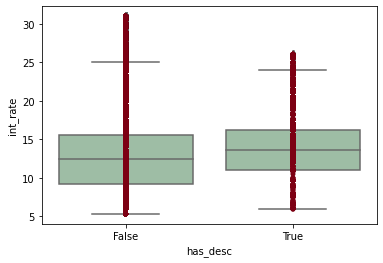

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x = 'has_desc', y ='int_rate', data = accepted_all, color='#99c2a2')
ax = sns.swarmplot(x = 'has_desc', y ='int_rate', data = accepted_all, color='#7d0013')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('int_rate ~ has_desc', data = accepted_all[['has_desc', 'int_rate']]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sum_sq,df,F,PR(>F)
has_desc,9.467813e+03,1.0,414.024947,5.024551e-92
Residual,3.266887e+07,1428601.0,NaN,NaN


In [ ]:
# 2(b) by group
s = accepted_all.groupby(['grade', 'has_desc']).agg({'int_rate': ['mean', 'median', 'std']}).reset_index()
s.columns = [col[1] if col[1] else col[0] for col in s.columns.tolist()]
s

,grade,has_desc,mean,median,std
0,A,False,7.045037,7.21,0.957158
1,A,True,7.892727,7.90,0.908570
2,B,False,10.490502,10.49,1.196773
3,B,True,11.801018,11.99,1.259627
4,C,False,13.943879,13.98,1.207614
5,C,True,14.837409,14.64,0.773135
6,D,False,17.819420,17.57,1.659609
7,D,True,18.047703,18.25,1.019464
8,E,False,21.246903,20.49,2.605391
9,E,True,21.412328,21.18,1.056126


In [ ]:
pvalues = []
for g in accepted_all[~accepted_all['grade'].isnull()]['grade'].unique():
  df = accepted_all[accepted_all['grade'] == g]
  model = ols('int_rate ~ has_desc', data = df[['has_desc', 'int_rate']]).fit()
  anova_table = sm.stats.anova_lm(model, typ=2)
  pvalues.append([g, anova_table['PR(>F)']['has_desc']])
results = pd.DataFrame(pvalues, columns=['grade', 'p'])
results.sort_values(by=['grade'], inplace = True)
results.reset_index(drop=True)

,grade,p
0,A,0.000000e+00
1,B,0.000000e+00
2,C,0.000000e+00
3,D,5.774249e-11
4,E,6.296213e-02
5,F,1.717552e-08
6,G,3.390101e-21


In [ ]:
# select useful columns
descriptions = accepted_all[~accepted_all['desc'].isnull()][['desc', 'funded_amnt', 'debt_settlement_flag', 'loan_status', 'int_rate', 'grade']]
descriptions = descriptions.reset_index()

In [ ]:
descriptions['paid'] = False
descriptions.loc[descriptions['loan_status'] == 'Fully Paid', 'paid'] = True

In [ ]:
# clean up text
import re
def clean(ex):
  ex = re.sub(r'( {1,}Borrower added on (\d+[\.\/-]\d+[\.\/-]\d+) >)','',ex)
  # ex = re.sub(r'\$?[\d+.?,?\d+]\$?','NUM',ex)
  ex = re.sub(r'\$?(?:[\d]+[.,]?\b)+\$?','NUM',ex)
  ex = re.sub(r'(<br>)+','.',ex)
  return ex
descriptions['desc_clean'] = descriptions.apply(lambda row: clean(row['desc']), axis = 1)

In [ ]:
# remove punctuations and turn into all lower-case
def punc_rem(text):
  for c in string.punctuation:
    text = text.replace(c, '')
  return text.lower()
descriptions['desc_rem'] = descriptions.apply(lambda row: punc_rem(row['desc_clean']), axis = 1)

In [ ]:
# count number of words in the description
descriptions['#words'] = descriptions.apply(lambda row: len(row['desc_clean']), axis = 1)

In [ ]:
# remove empty descriptions
descriptions = descriptions[descriptions['#words'] > 0]

In [ ]:
# remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = list(stopwords.words('english'))
descriptions['desc_sw_rm'] = descriptions['desc_rem'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# lemmitization
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
descriptions['desc_lem'] = descriptions.apply(lambda row: ' '.join([lemmatizer.lemmatize(words) for words in row['desc_sw_rm'].split()]), axis = 1)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# find number of words that may be misspelled
from spellchecker import SpellChecker
spell = SpellChecker()
descriptions['typos'] = descriptions.apply(lambda row: spell.unknown(row['desc_rem'].split()), axis = 1)
descriptions['#typo'] = descriptions.apply(lambda row: len(row['typos']), axis = 1)

In [ ]:
# scrape acronyms list into dictionary
from bs4 import BeautifulSoup
import requests, json
resp = requests.get("http://www.netlingo.com/acronyms.php")
soup = BeautifulSoup(resp.text, "html.parser")
slangdict= {}
key=""
value=""
for div in soup.findAll('div', attrs={'class':'list_box3'}):
  for li in div.findAll('li'):
      for a in li.findAll('a'):
          key =a.text
          value = li.text.split(key)[1]
          slangdict[key]=value

In [ ]:
# find number of slangs & abbreviations
def slang(text):
  num = 0
  for word in text.split():
    if word in slangdict:
      num = num + 1
  return num
descriptions['#slang'] = descriptions.apply(lambda row: slang(row['desc_rem']), axis = 1)

In [ ]:
# create boolean columns
descriptions.loc[descriptions['#slang'] > 0, 'has_slang'] = True
descriptions.loc[descriptions['#slang'] <= 0, 'has_slang'] = False

descriptions.loc[descriptions['#typo'] > 0, 'has_typo'] = True
descriptions.loc[descriptions['#typo'] <= 0, 'has_typo'] = False

In [ ]:
# count number of grammar errs
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
descriptions['grammar'] = descriptions.apply(lambda row: tool.check(row['desc_clean']), axis=1)
descriptions['#grammar err'] = descriptions.apply(lambda row: len(row['grammar']), axis=1)

Unzipping /tmp/tmpg3fpqi71.zip to /root/.cache/language_tool_python.
Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /root/.cache/language_tool_python.


In [ ]:
# count second-person pronouns ("lenders", "you", "your", "yours", "yourself")
descriptions['#2nd person'] = descriptions.apply(lambda row: row['desc_rem'].split().count('lenders') + row['desc_rem'].split().count('you') + row['desc_rem'].split().count('your') + row['desc_rem'].split().count('yours') + row['desc_rem'].split().count('yourself'), axis = 1)

In [ ]:
# count plural first-person pronouns ("we", "us", "our", "ourselves")
descriptions['#1st person plural'] = descriptions.apply(lambda row: row['desc_rem'].split().count('we') + row['desc_rem'].split().count('us') + row['desc_rem'].split().count('our') + row['desc_rem'].split().count('ourselves'), axis = 1)

In [ ]:
# count business related keywords ("business", "company", "firm")
descriptions['#1st person plural'] = descriptions.apply(lambda row: row['desc_rem'].split().count('business') + row['desc_rem'].split().count('company') + row['desc_rem'].split().count('firm'), axis = 1)

In [ ]:
# count family related keywords ("family", "parent", "child", "home")
descriptions['#1st person plural'] = descriptions.apply(lambda row: row['desc_rem'].split().count('family') + row['desc_rem'].split().count('parent') + row['desc_rem'].split().count('child') + row['desc_rem'].split().count('home'), axis = 1)

In [ ]:
# subjectivity evaluation (parts-of-speech analysis)
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob
from collections import Counter

def adj(text):
    blobed = TextBlob(text)
    counts = Counter(tag for word,tag in blobed.tags)
    adj_list = []
    adv_list = []
    adj_tag_list = ['JJ','JJR','JJS']
    adv_tag_list = ['RB','RBR','RBS']
    for (a, b) in blobed.tags:
        if b in adj_tag_list:
           adj_list.append(a)
        elif b in adv_tag_list:
           adv_list.append(a)
        else:
            pass
    return adj_list, adv_list, counts['JJ']+counts['JJR']+counts['JJS'], counts['RB']+counts['RBR']+counts['RBS']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
descriptions['#adj'] = descriptions.apply(lambda row: adj(row['desc_rem'])[2], axis = 1)

In [ ]:
descriptions['#adv'] = descriptions.apply(lambda row: adj(row['desc_rem'])[3], axis = 1)

In [ ]:
descriptions['pos'] = descriptions['#adj'] + descriptions['#adv']

In [ ]:
# emotion analysis
from transformers import pipeline
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

Downloading:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
descriptions['emotion'] = descriptions.apply(lambda row: emotion(row['desc_rem'])[0]['label'], axis = 1)

In [ ]:
descriptions['emotion'].value_counts().to_DataFrame()

NameError: ignored

In [ ]:
# keyword counts
family_kw = ['home', 'improvement', 'medical', 'house', 'repair', 'kitchen', 'remodel', 'roof', 'car', 'vacation', 'bathroom', 'wedding', 'family']
debt_kw = ['consolidation', 'debt', 'credit', 'card', 'bills', 'loan', 'monthly', 'payoff']
business_kw = ['cycle', 'event', 'expense', 'budget', 'build' ,'business']

In [ ]:
def kw_count(text, name):
  num = 0
  for w in text.split():
    if w in name:
      num = num + 1
  return num
descriptions['#family'] = descriptions.apply(lambda row: kw_count(row['desc_lem'], family_kw), axis = 1)
descriptions['#debt'] = descriptions.apply(lambda row: kw_count(row['desc_lem'], debt_kw), axis = 1)
descriptions['#business'] = descriptions.apply(lambda row: kw_count(row['desc_lem'], business_kw), axis = 1)

In [ ]:
# some basic info
from collections import Counter

def sum_table(group):
  gb = descriptions.groupby([group])
  summary = gb.size().to_frame(name='description_counts')
  summary = summary.join(gb.agg({'#typo': 'mean'}).rename(columns={'#typo': 'typo_count_mean'}))
  summary = summary.join(gb.agg({'#slang': 'mean'}).rename(columns={'#slang': 'slang_count_mean'}))
  summary = summary.join(gb.agg({'#grammar err': 'mean'}).rename(columns={'#grammar err': 'gram_count_mean'}))
  summary = summary.join(gb.agg({'#words': 'mean'}).rename(columns={'#words': 'word_count_mean'})).join(gb.agg({'#words': 'median'}).rename(columns={'#words': 'word_count_median'})).join(gb.agg({'#words': 'std'}).rename(columns={'#words': 'word_count_sd'})).reset_index()


  cw = gb['desc_lem'].apply(lambda x: Counter(" ".join(x).split()).most_common(30)).to_frame(name = 'common words').reset_index()
  cw['frequent_word_list'] = None
  for i in range(0, len(cw)):
    wordlist = []
    for w in cw['common words'][i]:
      wordlist.append(w[0])
    cw['frequent_word_list'][i] = wordlist
  all_words = cw['frequent_word_list'].sum()
  cw['unique_list'] = None
  for i in range(0, len(cw)):
    uniquelist = []
    for w in cw['frequent_word_list'][i]:
      if all_words.count(w) <= len(cw)/2:
        uniquelist.append(w)
    cw['unique_list'][i] = uniquelist
  summary =  pd.concat([summary, cw[['frequent_word_list', 'unique_list']]], axis=1)
  return summary

In [ ]:
sum_table('paid')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,paid,description_counts,typo_count_mean,slang_count_mean,gram_count_mean,word_count_mean,word_count_median,word_count_sd,frequent_word_list,unique_list
0,False,2517,0.231625,0.017878,1.609853,110.068335,78.0,96.724714,"[credit, card, pay, debt, loan, payment, conso...",[thank]
1,True,12823,0.227404,0.013725,1.591515,114.280278,82.0,99.405006,"[credit, card, debt, pay, loan, interest, paym...",[higher]


In [ ]:
sum_table('grade')

,grade,description_counts,typo_count_mean,slang_count_mean,gram_count_mean,word_count_mean,word_count_median,word_count_sd,frequent_word_list,unique_list
0,A,2585,0.243327,0.014313,1.683172,126.587234,93.0,108.920314,"[credit, card, debt, pay, loan, interest, num,...","[higher, balance, free, thank]"
1,B,5079,0.237842,0.013979,1.657216,117.021855,85.0,100.233423,"[credit, card, pay, debt, loan, interest, num,...","[higher, thank]"
2,C,4203,0.209850,0.016655,1.501784,107.809660,76.0,93.943596,"[credit, card, debt, pay, loan, payment, conso...","[higher, payoff]"
3,D,2277,0.239350,0.014932,1.568292,107.298639,75.0,97.607444,"[credit, card, debt, pay, loan, payment, num, ...",[improvement]
4,E,859,0.201397,0.008149,1.514552,103.682189,72.0,87.152107,"[credit, debt, card, pay, loan, payment, conso...","[improvement, business, thank]"
5,F,265,0.177358,0.007547,1.464151,100.528302,69.0,83.247760,"[credit, debt, pay, card, loan, payment, conso...","[paid, business, tax, consolidating, personal]"
6,G,72,0.208333,0.000000,1.666667,107.361111,71.5,94.033753,"[credit, card, loan, debt, payment, consolidat...","[business, cash, small, expense, payoff, buying]"


In [ ]:
list(descriptions.columns)

['index',
 'desc',
 'funded_amnt',
 'debt_settlement_flag',
 'loan_status',
 'int_rate',
 'grade',
 'desc_clean',
 'desc_rem',
 '#words',
 'desc_sw_rm',
 'desc_lem',
 'typos',
 '#typo',
 '#slang',
 'has_slang',
 'has_typo',
 'grammar',
 '#grammar err',
 '#2nd person',
 '#1st person plural',
 '#adj',
 '#adv',
 'emotion',
 '#family',
 '#debt',
 '#business',
 'paid',
 'pos']

In [ ]:
# set up features for linear regression
features = descriptions[['grade', '#words', 'has_typo', 'has_slang', '#grammar err', '#2nd person', '#1st person plural', 'pos', 'emotion', '#family', '#debt', '#business' ,'paid', 'int_rate']]
features

,grade,#words,has_typo,has_slang,#grammar err,#2nd person,#1st person plural,pos,emotion,#family,#debt,#business,paid,int_rate
0,B,268,False,False,1,0,5,10,realization,2,3,2,True,8.49
1,A,299,False,False,2,0,0,14,optimism,0,0,0,True,6.24
2,A,364,False,False,2,2,0,8,gratitude,0,2,1,True,6.89
3,B,256,False,False,0,0,0,6,desire,0,4,0,True,9.99
4,B,1,False,False,0,0,0,0,neutral,0,0,0,True,11.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15335,B,34,False,False,1,0,0,0,neutral,0,1,0,True,10.99
15336,B,76,False,False,1,0,0,2,approval,0,2,0,True,11.99
15337,A,33,False,False,1,0,0,0,neutral,0,1,0,False,7.90
15338,D,206,False,False,1,0,0,5,neutral,1,6,1,True,16.99


In [ ]:
features['paid']  = np.array(features['paid'], dtype=np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython 

In [ ]:
features['has_typo']  = np.array(features['has_typo'], dtype=np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython 

In [ ]:
features['has_slang']  = np.array(features['has_slang'], dtype=np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features['emotion_num'] = le.fit_transform(features['emotion'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
features

,grade,#words,has_typo,has_slang,#grammar err,#2nd person,#1st person plural,pos,emotion,#family,#debt,#business,paid,int_rate,emotion_num
0,B,268,False,False,1,0,5,10,realization,2,3,2,1,8.49,22
1,A,299,False,False,2,0,0,14,optimism,0,0,0,1,6.24,20
2,A,364,False,False,2,2,0,8,gratitude,0,2,1,1,6.89,14
3,B,256,False,False,0,0,0,6,desire,0,4,0,1,9.99,8
4,B,1,False,False,0,0,0,0,neutral,0,0,0,1,11.49,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15335,B,34,False,False,1,0,0,0,neutral,0,1,0,1,10.99,19
15336,B,76,False,False,1,0,0,2,approval,0,2,0,1,11.99,4
15337,A,33,False,False,1,0,0,0,neutral,0,1,0,0,7.90,19
15338,D,206,False,False,1,0,0,5,neutral,1,6,1,1,16.99,19


In [ ]:
# Q3: does description content influence chance of loan getting paid?
from sklearn import linear_model
import statsmodels.api as sm

feat_list = list(features.columns)
feat_list.remove('paid')
feat_list.remove('int_rate')
feat_list.remove('grade')
feat_list.remove('emotion')

X = features[feat_list]
Y = features['paid']
# with statsmodels
log_reg = sm.Logit(Y, X).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.464274
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   paid   No. Observations:                15340
Model:                          Logit   Df Residuals:                    15329
Method:                           MLE   Df Model:                           10
Date:                Sun, 24 Jul 2022   Pseudo R-squ.:                -0.04010
Time:                        07:46:23   Log-Likelihood:                -7122.0
converged:                       True   LL-Null:                       -6847.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
#words                 0.0045      0.001      7.342      0.000       0.003       0.006
has_typo               0.0021      0.066      0.032      0.975      -0.127       0.131
has_slang             -0.1012      0.191     -0.530      0.596      -0.475       0.273
#grammar err          -0.0343      0.016     -2.151      0.032      -0.066      -0.003
#2nd person           -0.1164      0.062     -1.874      0.061      -0.238       0.005
#1st person plural     0.0556      0.045      1.230      0.219      -0.033       0.144
pos                   -0.0193      0.016     -1.207      0.227      -0.051       0.012
#family                0.0124      0.028      0.438      0.661      -0.043       0.068
#debt                  0.0949      0.014      6.639      0.000       0.067       0.123
#business             -0.1177      0.074     -1.595      0.111      -0.262       0.027
emotion_num            0.0617      0.002     29.914      0.000       0.058       0.066
======================================================================================
"""

In [ ]:
def logi(grade):
  features_x = features[features['grade'] == grade]
  X = features_x[feat_list]
  Y = features_x['paid']
  # with statsmodels
  log_reg = sm.Logit(Y, X).fit()
  return(log_reg.summary())

In [ ]:
logi("A")

Optimization terminated successfully.
         Current function value: 0.239241
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   paid   No. Observations:                 2585
Model:                          Logit   Df Residuals:                     2574
Method:                           MLE   Df Model:                           10
Date:                Sun, 24 Jul 2022   Pseudo R-squ.:                 -0.1606
Time:                        07:48:20   Log-Likelihood:                -618.44
converged:                       True   LL-Null:                       -532.85
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
#words                 0.0119      0.003      4.514      0.000       0.007       0.017
has_typo               0.2365      0.276      0.857      0.391      -0.304       0.777
has_slang             -0.5440      0.660     -0.824      0.410      -1.837       0.749
#grammar err          -0.0173      0.074     -0.232      0.816      -0.163       0.128
#2nd person           -0.3774      0.223     -1.692      0.091      -0.815       0.060
#1st person plural    -0.3184      0.118     -2.700      0.007      -0.550      -0.087
pos                   -0.0792      0.065     -1.226      0.220      -0.206       0.047
#family               -0.1481      0.109     -1.362      0.173      -0.361       0.065
#debt                  0.0820      0.056      1.457      0.145      -0.028       0.192
#business             -0.3198      0.360     -0.888      0.375      -1.026       0.386
emotion_num            0.1144      0.008     13.608      0.000       0.098       0.131
======================================================================================
"""

In [ ]:
logi("B")

Optimization terminated successfully.
         Current function value: 0.357724
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   paid   No. Observations:                 5079
Model:                          Logit   Df Residuals:                     5068
Method:                           MLE   Df Model:                           10
Date:                Sun, 24 Jul 2022   Pseudo R-squ.:                -0.05863
Time:                        07:48:28   Log-Likelihood:                -1816.9
converged:                       True   LL-Null:                       -1716.3
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
#words                 0.0055      0.001      4.188      0.000       0.003       0.008
has_typo              -0.1730      0.134     -1.294      0.196      -0.435       0.089
has_slang              0.4145      0.452      0.917      0.359      -0.471       1.300
#grammar err          -0.0136      0.035     -0.387      0.699      -0.082       0.055
#2nd person           -0.1742      0.125     -1.393      0.164      -0.419       0.071
#1st person plural    -0.0542      0.084     -0.642      0.521      -0.220       0.111
pos                    0.0050      0.035      0.144      0.886      -0.063       0.073
#family                0.0511      0.065      0.785      0.432      -0.076       0.179
#debt                  0.1336      0.030      4.389      0.000       0.074       0.193
#business             -0.1828      0.165     -1.108      0.268      -0.506       0.140
emotion_num            0.0790      0.004     18.005      0.000       0.070       0.088
======================================================================================
"""

In [ ]:
logi("C")

Optimization terminated successfully.
         Current function value: 0.508087
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   paid   No. Observations:                 4203
Model:                          Logit   Df Residuals:                     4192
Method:                           MLE   Df Model:                           10
Date:                Sun, 24 Jul 2022   Pseudo R-squ.:                -0.03161
Time:                        07:48:32   Log-Likelihood:                -2135.5
converged:                       True   LL-Null:                       -2070.1
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
#words                 0.0043      0.001      3.970      0.000       0.002       0.006
has_typo               0.1860      0.122      1.525      0.127      -0.053       0.425
has_slang              0.0030      0.341      0.009      0.993      -0.666       0.672
#grammar err          -0.0921      0.031     -2.968      0.003      -0.153      -0.031
#2nd person            0.0152      0.124      0.123      0.902      -0.228       0.258
#1st person plural     0.2077      0.103      2.011      0.044       0.005       0.410
pos                   -0.0456      0.028     -1.648      0.099      -0.100       0.009
#family                0.0762      0.051      1.495      0.135      -0.024       0.176
#debt                  0.0895      0.025      3.544      0.000       0.040       0.139
#business             -0.0780      0.128     -0.611      0.541      -0.328       0.172
emotion_num            0.0548      0.004     14.931      0.000       0.048       0.062
======================================================================================
"""

In [ ]:
# one-hot categorical columns
def oh(col):
  one_hot = pd.get_dummies(features[col], drop_first = True)
  return features.join(one_hot)
features = oh('emotion')

In [ ]:
features = features.drop('emotion', axis = 1)

In [ ]:
# Q4: does description content influence interest rate?
import statsmodels.api as sm

feat_list = list(features.columns)
feat_list.remove('paid')
feat_list.remove('int_rate')
feat_list.remove('grade')
feat_list.remove('emotion_num')

X = features[feat_list]
Y = features['int_rate']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     8.617
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           8.11e-45
Time:                        07:28:56   Log-Likelihood:                -43366.
No. Observations:               15340   AIC:                         8.681e+04
Df Residuals:                   15303   BIC:                         8.709e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.6865      0.281     48.640      0.000      13.135      14.238
#words                -0.0003      0.001     -0.369      0.712      -0.002       0.001
has_typo              -0.0786      0.100     -0.787      0.431      -0.274       0.117
has_slang             -0.1203      0.299     -0.403      0.687      -0.706       0.465
#grammar err           0.0604      0.023      2.662      0.008       0.016       0.105
#2nd person           -0.1381      0.121     -1.145      0.252      -0.374       0.098
#1st person plural    -0.0412      0.059     -0.698      0.485      -0.157       0.075
pos                   -0.0729      0.023     -3.205      0.001      -0.117      -0.028
#family                0.2738      0.042      6.596      0.000       0.192       0.355
#debt                 -0.1339      0.021     -6.443      0.000      -0.175      -0.093
#business              0.7459      0.112      6.660      0.000       0.526       0.965
amusement             -0.7979      4.103     -0.194      0.846      -8.841       7.245
anger                 -1.6739      1.392     -1.203      0.229      -4.401       1.054
annoyance             -0.3805      0.847     -0.449      0.653      -2.040       1.280
approval               0.1544      0.280      0.552      0.581      -0.394       0.703
caring                 0.9164      0.350      2.621      0.009       0.231       1.602
confusion             -0.5058      1.693     -0.299      0.765      -3.824       2.812
curiosity             -1.3844      1.570     -0.882      0.378      -4.462       1.694
desire                 0.3416      0.302      1.131      0.258      -0.251       0.934
disappointment         0.2903      0.596      0.487      0.626      -0.879       1.459
disapproval           -0.8423      1.091     -0.772      0.440      -2.981       1.296
disgust                1.5611      2.909      0.537      0.591      -4.140       7.262
excitement             0.1991      0.679      0.293      0.769      -1.132       1.530
fear                   0.8911      1.002      0.889      0.374      -1.074       2.856
gratitude              0.3575      0.308      1.160      0.246      -0.246       0.961
grief                  4.5536      4.102      1.110      0.267      -3.487      12.595
joy                    0.9229      0.613      1.506      0.132      -0.278       2.124
love                  -0.5702      0.716     -0.797      0.426      -1.973       0.833
nervousness            1.8722      1.473      1.271      0.204      -1.014       4.759
neutral                0.5031      0.278      1.811      0.070      -0.041       1.048
optimism               0.2372      0.354      0.669      0.503      -0.458       0.932
pride                  1.1799      1.126      1.048      0.295      -1.028       3.388
realization           -0.0842      0.4

In [ ]:
def lr(grade):
  features_x = features[features['grade'] == grade]
  X = features_x[feat_list]
  Y = features_x['int_rate']
  # with statsmodels
  X = sm.add_constant(X) # adding a constant
  model = sm.OLS(Y, X).fit()
  return(model.summary())

In [ ]:
lr('A')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.186
Date:                Sun, 24 Jul 2022   Prob (F-statistic):              0.218
Time:                        07:30:49   Log-Likelihood:                -3400.5
No. Observations:                2585   AIC:                             6867.
Df Residuals:                    2552   BIC:                             7060.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.8939      0.124     63.605      0.000       7.650       8.137
#words                -0.0011      0.000     -2.340      0.019      -0.002      -0.000
has_typo              -0.0083      0.054     -0.154      0.878      -0.113       0.097
has_slang             -0.0875      0.159     -0.552      0.581      -0.398       0.223
#grammar err           0.0014      0.012      0.119      0.905      -0.021       0.024
#2nd person            0.0319      0.054      0.587      0.557      -0.075       0.138
#1st person plural    -0.0083      0.030     -0.274      0.784      -0.068       0.051
pos                    0.0220      0.012      1.878      0.060      -0.001       0.045
#family                0.0369      0.024      1.537      0.124      -0.010       0.084
#debt                  0.0342      0.011      3.045      0.002       0.012       0.056
#business              0.1162      0.073      1.589      0.112      -0.027       0.260
amusement          -7.485e-17   1.19e-15     -0.063      0.950   -2.41e-15    2.26e-15
anger                 -0.9424      0.471     -1.999      0.046      -1.867      -0.018
annoyance             -0.0934      0.423     -0.221      0.825      -0.923       0.736
approval              -0.0687      0.124     -0.556      0.578      -0.311       0.174
caring                -0.1677      0.169     -0.995      0.320      -0.498       0.163
confusion              0.9083      0.916      0.992      0.321      -0.887       2.704
curiosity             -0.3268      0.921     -0.355      0.723      -2.133       1.479
desire                -0.0757      0.137     -0.554      0.580      -0.344       0.192
disappointment        -0.3967      0.325     -1.221      0.222      -1.034       0.240
disapproval            0.9591      0.917      1.046      0.296      -0.839       2.757
disgust             4.111e-18   4.05e-16      0.010      0.992   -7.89e-16    7.98e-16
excitement            -0.3823      0.300     -1.275      0.202      -0.970       0.206
fear                  -0.0868      0.654     -0.133      0.894      -1.369       1.196
gratitude              0.0105      0.137      0.077      0.939      -0.258       0.279
grief               3.488e-16   1.63e-16      2.138      0.033    2.88e-17    6.69e-16
joy                   -0.0585      0.363     -0.161      0.872      -0.771       0.654
love                  -0.1709      0.363     -0.471      0.638      -0.882       0.541
nervousness            0.4402      0.653      0.674      0.500      -0.840       1.720
neutral               -0.0228      0.122     -0.187      0.852      -0.263       0.217
optimism              -0.1189      0.165     -0.722      0.470      -0.442       0.204
pride                 -1.9124      0.916     -2.088      0.037      -3.709      -0.116
realization           -0.0742      0.2

In [ ]:
lr('B')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.169
Date:                Sun, 24 Jul 2022   Prob (F-statistic):              0.233
Time:                        07:30:56   Log-Likelihood:                -8359.3
No. Observations:                5079   AIC:                         1.679e+04
Df Residuals:                    5045   BIC:                         1.701e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.7580      0.156     75.232      0.000      11.452      12.064
#words                -0.0007      0.000     -1.460      0.144      -0.002       0.000
has_typo              -0.0467      0.053     -0.884      0.377      -0.150       0.057
has_slang              0.0518      0.164      0.316      0.752      -0.269       0.373
#grammar err           0.0091      0.011      0.814      0.416      -0.013       0.031
#2nd person            0.0214      0.063      0.340      0.734      -0.102       0.145
#1st person plural     0.0044      0.031      0.144      0.885      -0.055       0.064
pos                    0.0069      0.012      0.568      0.570      -0.017       0.031
#family                0.0482      0.024      2.013      0.044       0.001       0.095
#debt                  0.0033      0.011      0.296      0.767      -0.019       0.025
#business              0.0542      0.061      0.881      0.378      -0.066       0.175
amusement              1.1722      1.269      0.924      0.356      -1.316       3.660
anger                  0.9324      0.903      1.032      0.302      -0.839       2.703
annoyance              0.3228      0.446      0.724      0.469      -0.552       1.197
approval               0.0066      0.155      0.042      0.966      -0.298       0.311
caring                 0.1023      0.196      0.523      0.601      -0.281       0.486
confusion             -0.0139      0.647     -0.021      0.983      -1.283       1.255
curiosity             -2.0399      0.744     -2.740      0.006      -3.499      -0.580
desire                 0.0649      0.167      0.390      0.697      -0.262       0.391
disappointment         0.2844      0.293      0.971      0.332      -0.290       0.859
disapproval           -0.5690      0.446     -1.277      0.202      -1.442       0.305
disgust             4.415e-16   4.07e-16      1.084      0.278   -3.57e-16    1.24e-15
excitement             0.2216      0.408      0.543      0.587      -0.578       1.021
fear                   0.6384      0.648      0.984      0.325      -0.633       1.910
gratitude              0.1712      0.168      1.019      0.308      -0.158       0.501
grief               -5.83e-16   3.19e-16     -1.829      0.068   -1.21e-15     4.2e-17
joy                    0.1945      0.326      0.596      0.551      -0.445       0.834
love                  -0.1015      0.325     -0.312      0.755      -0.738       0.536
nervousness            1.3134      1.268      1.035      0.301      -1.173       3.800
neutral                0.0858      0.154      0.556      0.579      -0.217       0.389
optimism              -0.0609      0.193     -0.315      0.753      -0.440       0.318
pride                  0.1723      0.535      0.322      0.747      -0.877       1.222
realization           -0.0535      0.2

In [ ]:
lr('C')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9891
Date:                Sun, 24 Jul 2022   Prob (F-statistic):              0.485
Time:                        07:31:03   Log-Likelihood:                -4865.5
No. Observations:                4203   AIC:                             9799.
Df Residuals:                    4169   BIC:                         1.001e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.7351      0.114    129.265      0.000      14.512      14.959
#words             -3.161e-05      0.000     -0.095      0.924      -0.001       0.001
has_typo              -0.0197      0.037     -0.535      0.593      -0.092       0.052
has_slang              0.0472      0.104      0.455      0.649      -0.156       0.251
#grammar err           0.0023      0.009      0.239      0.811      -0.016       0.021
#2nd person           -0.1077      0.049     -2.200      0.028      -0.204      -0.012
#1st person plural     0.0204      0.023      0.889      0.374      -0.025       0.065
pos                    0.0023      0.008      0.272      0.786      -0.014       0.019
#family               -0.0134      0.015     -0.913      0.361      -0.042       0.015
#debt                 -0.0094      0.008     -1.247      0.212      -0.024       0.005
#business              0.0291      0.040      0.731      0.465      -0.049       0.107
amusement          -2.287e-16    6.9e-16     -0.331      0.740   -1.58e-15    1.12e-15
anger                 -0.7054      0.781     -0.903      0.367      -2.237       0.827
annoyance             -0.5931      0.281     -2.113      0.035      -1.143      -0.043
approval               0.1167      0.113      1.029      0.303      -0.106       0.339
caring                 0.2382      0.138      1.728      0.084      -0.032       0.508
confusion           4.664e-16   3.87e-16      1.205      0.228   -2.92e-16    1.22e-15
curiosity              0.4981      0.460      1.083      0.279      -0.404       1.400
desire                 0.1952      0.121      1.611      0.107      -0.042       0.433
disappointment         0.2726      0.258      1.059      0.290      -0.232       0.778
disapproval            0.4789      0.364      1.317      0.188      -0.234       1.192
disgust                0.1462      0.559      0.261      0.794      -0.950       1.243
excitement            -0.0115      0.280     -0.041      0.967      -0.561       0.538
fear                   0.0004      0.312      0.001      0.999      -0.612       0.613
gratitude              0.1760      0.128      1.373      0.170      -0.075       0.427
grief               -2.51e-16   1.83e-16     -1.369      0.171   -6.11e-16    1.08e-16
joy                    0.0325      0.234      0.139      0.890      -0.427       0.492
love                  -0.1959      0.335     -0.585      0.559      -0.853       0.461
nervousness            0.1433      0.558      0.257      0.797      -0.951       1.238
neutral                0.1340      0.113      1.191      0.234      -0.087       0.355
optimism               0.0824      0.140      0.587      0.557      -0.193       0.358
pride                  0.2884      0.782      0.369      0.712      -1.245       1.822
realization            0.1742      0.1

In [ ]:
# find number of second-person pronouns ("you", "your", "yours", "yourself")
descriptions['#2nd person'] = descriptions.apply(lambda row: row['desc_rem'].split().count('you') + row['desc_rem'].split().count('your') + row['desc_rem'].split().count('yours') + row['desc_rem'].split().count('yourself'), axis = 1)

In [ ]:
# find number of plural first-person pronouns ("we", "us", "our", "ourselves")
descriptions['#1st person plural'] = descriptions.apply(lambda row: row['desc_rem'].split().count('we') + row['desc_rem'].split().count('us') + row['desc_rem'].split().count('our') + row['desc_rem'].split().count('ourselves'), axis = 1)

In [ ]:
# find number of plural first-person pronouns ("we", "us", "our", "ourselves")
descriptions['#1st person plural'] = descriptions.apply(lambda row: row['desc_rem'].split().count('we') + row['desc_rem'].split().count('us') + row['desc_rem'].split().count('our') + row['desc_rem'].split().count('ourselves'), axis = 1)

In [ ]:
descriptions['loan_status'].value_counts()

Fully Paid            12823
Charged Off            2412
Current                  86
Late (31-120 days)       10
In Grace Period           6
Late (16-30 days)         3
Name: loan_status, dtype: int64

In [ ]:
descriptions

,index,desc,funded_amnt,debt_settlement_flag,loan_status,int_rate,grade,desc_clean,desc_rem,#words,...,#2nd person,#1st person plural,#adj,#adv,emotion,#family,#debt,#business,paid,pos
0,1480,We knew that using our credit cards to finance...,6400.0,N,Fully Paid,8.49,B,We knew that using our credit cards to finance...,we knew that using our credit cards to finance...,268,...,0,5,7,3,realization,2,3,2,True,10
1,33065,"I had a bad year two years ago, with some late...",10000.0,N,Fully Paid,6.24,A,"I had a bad year two years ago, with some late...",i had a bad year two years ago with some late ...,299,...,0,0,12,2,optimism,0,0,0,True,14
2,37860,"Lenders, I have the ability to pay off my cur...",10000.0,N,Fully Paid,6.89,A,"Lenders, I have the ability to pay off my cur...",lenders i have the ability to pay off my curr...,364,...,2,0,7,1,gratitude,0,2,1,True,8
3,50494,"I paid off my first Prosper loan, but had an ...",11000.0,N,Fully Paid,9.99,B,"I paid off my first Prosper loan, but had an ...",i paid off my first prosper loan but had an e...,256,...,0,0,5,1,desire,0,4,0,True,6
4,61258,,6000.0,N,Fully Paid,11.49,B,,,1,...,0,0,0,0,neutral,0,0,0,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15335,1352677,Borrower added on 12/10/13 > all my loans in...,6000.0,N,Fully Paid,10.99,B,all my loans in one auto payment.,all my loans in one auto payment,34,...,0,0,0,0,neutral,0,1,0,True,0
15336,1352678,Borrower added on 12/10/13 > pay off higher ...,10000.0,N,Fully Paid,11.99,B,pay off higher interest credit cards and have...,pay off higher interest credit cards and have...,76,...,0,0,2,0,approval,0,2,0,True,2
15337,1352681,Borrower added on 12/09/13 > consolidate all...,18000.0,N,Charged Off,7.90,A,consolidate all credit accounts.,consolidate all credit accounts,33,...,0,0,0,0,neutral,0,1,0,False,0
15338,1352687,Borrower added on 12/06/13 > I am going to c...,20700.0,N,Fully Paid,16.99,D,I am going to consolidate a credit card debt ...,i am going to consolidate a credit card debt ...,206,...,0,0,2,3,neutral,1,6,1,True,5


In [ ]:
descriptions.to_csv("all_data.csv")